In [89]:
import pandas as pd
files = [
    "../dataset/standardised.heart-disease.csv",
    "../dataset/standardised.penguins.csv",
    "../dataset/standardised.poker-hand.csv"
]

chosen_file = files[0]  # change this to select a different dataset

file_name = chosen_file.split("/")[-1]
data_set_name = file_name.split(".")[1]

# getting the headers
file = open(chosen_file, "r")
header_line = file.readline()
file.close()

headers = header_line.split(",")
headers[-1] = headers[-1].replace("\n", "")

# read the file
df = pd.read_csv(chosen_file, encoding = 'ISO-8859-1')


In [90]:
# amount of rows and columns in the dataset
print(df.shape)


(297, 14)


In [91]:
# print the first 5 rows of the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [92]:
# convert the last column to binary 1 and 0, if greater than 1, then 1, else 0
last_col_name = headers[-1]
df[last_col_name] = df[last_col_name].apply(lambda x: 1 if x > 0 else 0)

# print the first 5 rows of the dataset again to see the changes

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [93]:
import numpy as np
# check if there are samples with missing values
# if there are, replace them with the mean of the rest of the samples

df.replace('?', np.nan, inplace = True)

num_ambiguous = df.isna().any(axis = 1).sum()
print(f"Number of rows NaN values: {num_ambiguous}")

df = df.astype(float)

df.fillna(df.mean(), inplace = True)


Number of rows NaN values: 0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# split the dataset into features and labels
# the last column is the label, the rest are features, binary-ize the last column

x = df.drop(columns = [last_col_name])

y = df[last_col_name].apply(lambda x: 1 if x > 0 else 0)

# split the dataset into training and testing sets, test_size determine testing data/training data ratio
test_ratio = 0.5
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_ratio, random_state= 1)

# begin training
max_depth_choice = 7
random_state_choice = 1
trained_model = DecisionTreeClassifier(max_depth = max_depth_choice, random_state = random_state_choice)
trained_model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=1, random_state=1)

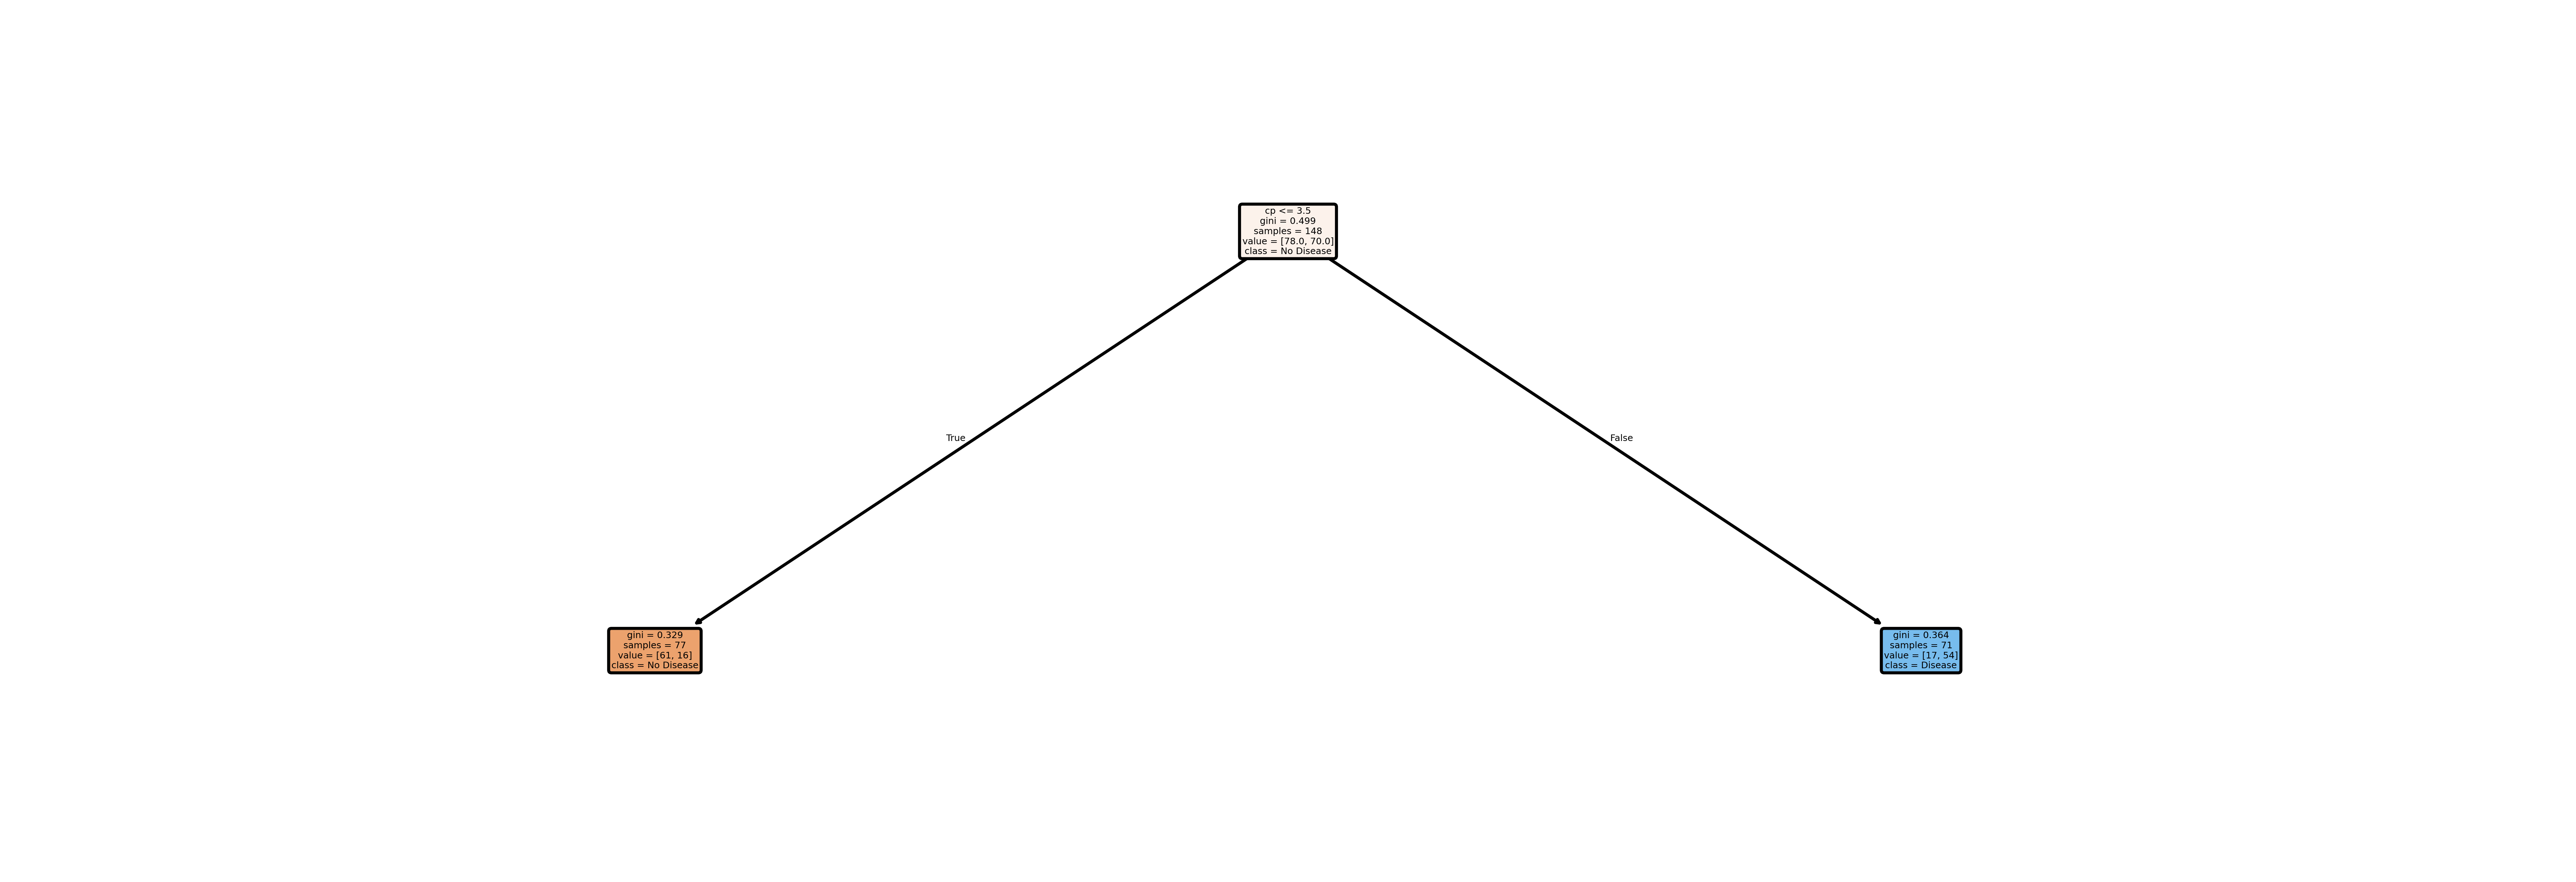

In [95]:
plt.figure(figsize = (15 , 5), dpi = 600)
plot_tree(trained_model, filled = True, feature_names = x_train.columns, class_names = ['No Disease', 'Disease'], rounded = True, fontsize = 3)

# display the tree with each element being:
# the chosen feature with its threshold
# the gini index, show how pure the node is
# the number of samples in the node
# the number of samples in each class
# result (Disease or No Disease)

output_folder = r"../output_trained_model/"
output_file_name = output_folder + str(1 - test_ratio) + "train-" + str(test_ratio) + "test" + "_" + data_set_name + ".png"

plt.savefig(output_file_name, bbox_inches = 'tight')

In [96]:
# test the model on the testing set and print the accuracy of the model

y_prediction_unseen = trained_model.predict(x_test)
y_prediction_trained = trained_model.predict(x_train)

from sklearn.metrics import accuracy_score

unseen_data_accuracy = accuracy_score(y_test, y_prediction_unseen)
trained_data_accuracy = accuracy_score(y_train, y_prediction_trained)

print(f"Accuracy on training data: {trained_data_accuracy:.2f}")
print(f"Accuracy on unseen data: {unseen_data_accuracy:.2f}")

# ideally, the accuracy on the training data should be higher than the accuracy on the testing data and they should be close to each other
# if trained acc is high but unseen acc is low, then the model is overfitting
# if both are low, then the model is underfitting
# if both are high, then the model is good

judgement = ""
if(abs(trained_data_accuracy - unseen_data_accuracy) > 0.1):
    judgement = "overfitting"
elif(trained_data_accuracy < 0.8 and unseen_data_accuracy < 0.8):
    judgement = "underfitting"
elif(trained_data_accuracy > 0.9 and unseen_data_accuracy > 0.9 and abs(trained_data_accuracy - unseen_data_accuracy) < 0.1):
    judgement = "good"
else:
    judgement = "average"

print(f"Judgement: {judgement}")


Accuracy on training data: 0.78
Accuracy on unseen data: 0.73
Judgement: underfitting
